In [ ]:
# EJERCICIO 1
# Use two maps of points from your country.
# Compute the distance matrix for both maps.
# Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.

In [ ]:
#instalo fiona
! pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.7 MB/s eta 0:00:00


In [ ]:
#URL del archivo GeoPackage
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

#importo geopandas y list layers
#listlayers--->hace una lista de todas las capas (layers) que tiene mi gpkg
import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['indicators', 'countries', 'rivers', 'cities']

In [ ]:
#a cada uno le asigno la capa correspondiente del gpkg y lo guardo como un geoDataFrame
paises=gpd.read_file(linkWorldMap,layer='countries')
rios=gpd.read_file(linkWorldMap,layer='rivers')

In [ ]:
# esto es lo que necesitamos!!
#de la columna country, selecciono Argentina y lo guardo en mi variable
argentina = paises[paises.COUNTRY=='Argentina']

#clipeo los rios (recorto las capas rios con la geometria de argentina)
riosArgentina_clipped = gpd.clip(gdf=rios, mask=argentina)

#proyecto aun sistema EPSG 5345
argentina_proy = argentina.to_crs(5345)
riosAR_proy = riosArgentina_clipped.to_crs(5345)

In [ ]:
#chequeo el tipo de geometria de las proyecciones
set(argentina_proy.geom_type), set(riosAR_proy.geom_type)

({'MultiPolygon'}, {'LineString', 'MultiLineString'})

In [ ]:
#importo os
import os

In [40]:
#extraigo el file del geodataframe del folder data y lo guardo
argentina_aeropuertos = gpd.read_file(os.path.join("data", "puntos_de_transporte_aereo_GB005.shp"))

In [22]:
#proyecto al sistema EPSG 5345
argentina_aeropuertos_proy = argentina_aeropuertos.to_crs(5345)

In [23]:
#para encontrar el punto donde se encuentra el centroide
argentina_proy.centroid

,0
10,POINT (3614883.261 6160531.222)


<Axes: >

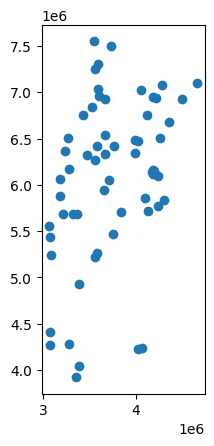

In [24]:
argentina_aeropuertos_proy.plot()

<Axes: >

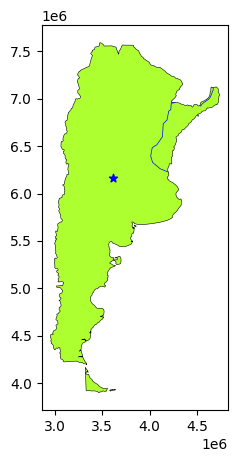

In [27]:
#rios encima del centroide
selec_rios2= riosAR_proy.cx[3614883.261:,6160531.222:]

#creo el mapa base como argentina ya proyectado y luego superpongo los rios con los que me quede antes (arriba del centroide)
#el centroide aparece como "*" y los rios como lineas azules
base = argentina_proy.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
argentina_proy.centroid.plot(ax=base, marker='*', color ='blue')
selec_rios2.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [28]:
import pandas as pd

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns disponibles
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [29]:
#renombro
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)

#me quedo con algunas columnas
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

#veo la info de la data
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [31]:
#puntos no proyectados
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326) # vemos que no esta proyectado

#me quedo con argentina
seaports_arg=seaports[seaports['Country Code']=='Argentina'].copy()

#reseteo los index
seaports_arg.reset_index(drop=True, inplace=True)

#proyecto a un sistema EPSG 5345
seaports_arg_proy=seaports_arg.to_crs(5345) # projected crs

In [32]:
#visualizo las coordenadas en X y en Y
argentina_proy.centroid.x.values[0],argentina_proy.centroid.y.values[0]

(3614883.2608355843, 6160531.221782898)

In [36]:
#guardo el centroide en x y en y
centroideX, centroideY=argentina_proy.centroid.x.values[0],argentina_proy.centroid.y.values[0]

#agrupo arriba y abajo correspondientemente y los seports tambien
argentina_aeropuertos_proy_abajo=argentina_aeropuertos_proy.cx[:, :centroideY]
argentina_aeropuertos_proy_arriba=argentina_aeropuertos_proy.cx[:, centroideY:]
seaports_arg_arriba=seaports_arg_proy.cx[:, centroideY:]

<Axes: >

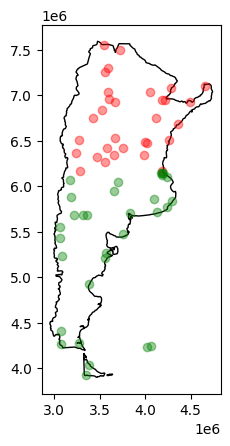

In [37]:
# uso de base a argentina y ploteo los puntos de los aeropuertos tanto arriba como abajo
base=argentina_proy.plot(color='white', edgecolor='black')
argentina_aeropuertos_proy_arriba.plot(ax=base,facecolor='red', alpha=0.4)
argentina_aeropuertos_proy_abajo.plot(ax=base,facecolor='green', alpha=0.4)

<Axes: >

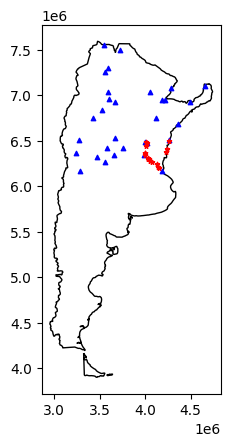

In [38]:
# solo usaremos los puntos de los aeropuertos y puertos de arriba (puntos azules y rojos)
base = argentina_proy.plot(color='white', edgecolor='black')
argentina_aeropuertos_proy_arriba.plot(ax=base, color= 'blue', marker='^', markersize = 10)
seaports_arg_arriba.plot(ax=base, color='red', marker='*', markersize = 10)

In [41]:
#de todas las geometrias de seaports aplico la funcion de distancia hasta aeropuertos arriba
#coloco el nombre correspondiente a las filas y columnas segun la data de cada tabla y lo ordeno alfabeticamente

distanceMatrixKM_sea_air =seaports_arg_arriba.set_index('portName').geometry.apply\
(lambda g: argentina_aeropuertos_proy_arriba.set_index('fna').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_sea_air

fna,Aeropuerto Brigadier Mayor César Raúl Ojeda,Aeropuerto Capitán Vicente Almandos Almonacid,Aeropuerto Comodoro Juan José Pierrestegui,Aeropuerto Coronel Felipe Varela,Aeropuerto Doctor Guillermo Snopek,Aeropuerto Domingo Faustino Sarmiento,Aeropuerto General Enrique Mosconi,Aeropuerto General Justo José de Urquiza,Aeropuerto Internacional Doctor Fernando Piragine Niveyro,Aeropuerto Internacional El Pucú,...,Aeropuerto Internacional Valle del Conlara,Aeropuerto Metropolitano Santa Fe - Sauce Viejo,Aeropuerto Primer Teniente Jorge Eduardo Casco,Aeropuerto Regional Presidente Néstor Carlos Kirchner,Aeropuerto Río Cuarto,Aeropuerto Suboficial Ayudante Santiago Germano,Aeropuerto Teniente Daniel Jukic,Aeropuerto Termas de Río Hondo,Aeropuerto Vicecomodoro Ángel de la Paz Aragonés,Aeropuerto Villa Reynolds
portName,,,,,,,,,,,,,,,,,,,,,
Campana,692.290803,911.476621,330.477315,893.739352,1481.649425,930.903622,1366.150041,298.992687,747.466006,888.156229,...,612.339849,322.029315,837.034983,447.039448,507.580360,869.978537,555.709820,933.349979,874.654390,595.609558
Colon,780.505192,887.838110,102.822788,836.959013,1339.511595,977.358027,1205.559660,228.226055,535.428790,670.143109,...,665.496086,260.073393,650.896724,481.978273,586.208191,992.009273,368.213941,841.064090,775.582311,698.947338
Concepcion Del Uruguay,766.094468,888.787228,133.648544,842.400100,1358.403979,969.102217,1227.001577,226.952944,563.984030,699.783329,...,654.898696,258.773990,675.408036,471.958574,571.778977,974.071786,391.883483,851.690497,786.968532,682.256437
Concordia,811.754118,872.707291,11.273958,809.147188,1272.435688,988.801476,1132.172336,237.758191,446.532336,579.285019,...,686.457974,266.772451,571.116041,504.177233,619.501587,1032.821607,293.048337,798.325844,731.142741,737.759801
Diamante,551.720028,659.806749,266.278251,624.501816,1203.442927,738.354491,1094.332745,34.620914,546.064926,693.578543,...,428.920936,42.445767,591.673690,245.521808,359.751543,774.373991,331.879390,654.207544,594.515841,479.289630
Parana,573.887150,654.515547,246.025463,611.291225,1173.344242,748.973530,1060.813032,9.372864,505.694821,653.225349,...,445.510745,25.942080,552.581077,264.190338,384.598059,800.546622,291.401097,632.730516,571.283506,506.075018
Puerto Ibicuy,668.904879,870.570913,294.968390,849.269483,1432.829901,900.511516,1317.268376,250.255458,703.666015,845.586088,...,581.205521,273.763401,789.551105,410.721493,480.315242,855.717057,509.061967,886.233938,827.053413,574.927848
Puerto San Martin,529.061561,686.864762,303.420554,664.370504,1265.940332,736.840046,1161.239209,105.796220,616.958149,764.331206,...,419.781700,112.284837,664.172050,239.025935,334.713592,741.303362,403.697723,706.022520,649.060603,447.428675
Ramallo,590.465377,789.089148,308.894924,771.532658,1371.412467,818.182794,1262.675566,193.576661,683.189985,828.598029,...,498.817580,210.969625,750.732157,327.575800,399.896827,784.420991,477.743589,814.538825,757.274844,498.853105


In [ ]:
# Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)
SomeStats
# seleccionando la fila 'Diamante'

,mean,min,max
portName,,,
Campana,756.456517,49.174990,1481.649425
Colon,687.760309,102.822788,1339.511595
Concepcion Del Uruguay,694.597491,133.648544,1358.403979
Concordia,661.044060,11.273958,1272.435688
Diamante,569.788379,34.620914,1203.442927
Parana,558.913346,9.372864,1173.344242
Puerto Ibicuy,720.324256,96.367278,1432.829901
Puerto San Martin,599.857698,22.711237,1265.940332
Ramallo,670.607412,95.279606,1371.412467


In [42]:
#encuentro la minima distancia de Diamante y el aeropuerto correspondiente a esta
distanceMatrixKM_sea_air.loc['Diamante'].min(), distanceMatrixKM_sea_air.loc['Diamante'].idxmin()

(34.62091381330375, 'Aeropuerto General Justo José de Urquiza')

In [44]:
#guardo variables
min_distance_diamante = distanceMatrixKM_sea_air.loc['Diamante'].min()
column_min_diamante = distanceMatrixKM_sea_air.loc['Diamante'].idxmin()

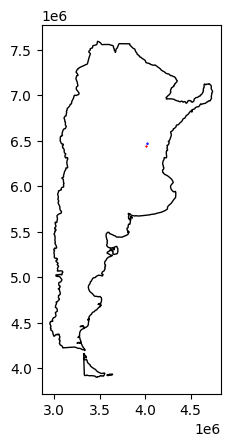

In [46]:
import matplotlib.pyplot as plt

# arriba encontramos la distancia mínima y el aeropuerto más cercano al puerto "Diamante"

#saco las coordenandas de "Diamante"
diamante_coords = seaports_arg_arriba[seaports_arg_arriba['portName'] == 'Diamante'].geometry.iloc[0]

#saco las coordenadas del aeropuerto mas cercano
closest_airport_coords = argentina_aeropuertos_proy_arriba[argentina_aeropuertos_proy_arriba['fna'] == column_min_diamante].geometry.iloc[0]

#ploteo la base
base = argentina_proy.plot(color='white', edgecolor='black')  # Base map

#ploteo "Diamante" (seaport)
plt.plot(diamante_coords.x, diamante_coords.y, marker='*', markersize=1, color='red', label='Diamante')

#ploteo the closest airport
plt.plot(closest_airport_coords.x, closest_airport_coords.y, marker='^', markersize=1, color='blue', label=column_min_diamante)

In [47]:
# EJERCICIO 2
# Use a map of points and a map of lines from your country.
# Compute the distance matrix for both.
# Select one line of the distance matrix, and plot the closests and the farthest point to that line.

In [48]:
#me quedo con los rios que esten  del centroide (encima de el)
selec_rios= riosAR_proy.cx[:,6160531.222:]

In [49]:
#visualizo cuales son en el geodataframe
selec_rios

,NAME,SYSTEM,geometry
56,Parana,Parana,"MULTILINESTRING ((4245550.485 6958364.517, 425..."
55,Paraguay,Parana,"LINESTRING (4245333.32 6960090.618, 4244846.62..."


In [50]:
#de todas las geometrias de argentina aeropuertos arriba (puntos) saco la distancia con los rios selecionados (lineas) con la funcion definida
#coloco el nombre correspondiente a las filas y columnas segun la data de cada tabla y lo ordeno alfabeticamente
distanceMatrixKM_riv_air=selec_rios.set_index('NAME').geometry.apply\
(lambda g: argentina_aeropuertos_proy_arriba.set_index('fna').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

fna,Aeropuerto Brigadier Mayor César Raúl Ojeda,Aeropuerto Capitán Vicente Almandos Almonacid,Aeropuerto Comodoro Juan José Pierrestegui,Aeropuerto Coronel Felipe Varela,Aeropuerto Doctor Guillermo Snopek,Aeropuerto Domingo Faustino Sarmiento,Aeropuerto General Enrique Mosconi,Aeropuerto General Justo José de Urquiza,Aeropuerto Internacional Doctor Fernando Piragine Niveyro,Aeropuerto Internacional El Pucú,...,Aeropuerto Internacional Valle del Conlara,Aeropuerto Metropolitano Santa Fe - Sauce Viejo,Aeropuerto Primer Teniente Jorge Eduardo Casco,Aeropuerto Regional Presidente Néstor Carlos Kirchner,Aeropuerto Río Cuarto,Aeropuerto Suboficial Ayudante Santiago Germano,Aeropuerto Teniente Daniel Jukic,Aeropuerto Termas de Río Hondo,Aeropuerto Vicecomodoro Ángel de la Paz Aragonés,Aeropuerto Villa Reynolds
NAME,,,,,,,,,,,,,,,,,,,,,
Paraguay,1007.038347,848.043644,449.010412,730.928952,917.743948,1075.215390,747.510495,536.583900,31.660345,122.339383,...,859.355370,540.470947,208.489415,723.870309,852.797285,1246.287072,243.064329,639.435730,577.878435,973.382845
Parana,550.138983,661.273376,154.876724,616.191876,913.726484,750.262426,745.756027,2.941722,11.332473,117.978814,...,435.564078,34.461745,198.001767,252.661584,356.072951,766.106442,35.555451,583.017058,514.611054,471.489436


In [51]:
#En este caso seleccionare el rio Parana como la linea que deseo

In [52]:
#saco la distancia minima al rio parana y el nombre del aeropuerto que tiene dicha distancia minima
distanceMatrixKM_riv_air.loc['Parana'].min(), distanceMatrixKM_sea_air.loc['Parana'].idxmin()

(2.9417215800943453, 'Aeropuerto General Justo José de Urquiza')

In [53]:
#saco la distancia maxima al rio Parana y el nombre del aeropuerto que tiene dicha distancia maxima
distanceMatrixKM_riv_air.loc['Parana'].max(), distanceMatrixKM_sea_air.loc['Parana'].idxmax()

(913.7264840250359, 'Aeropuerto Doctor Guillermo Snopek')

In [54]:
#veo cuales son los aeropuertos arriba
argentina_aeropuertos_proy_arriba

,gid,entidad,fna,gna,nam,fun,fdc,sag,geometry
1,65,0,Aeropuerto Suboficial Ayudante Santiago Germano,Aeropuerto,Suboficial Ayudante Santiago Germano,6.0,IGN/ORSNA,IGN,POINT (3279743.898 6170094.108)
2,72,0,Aeropuerto Comodoro Juan José Pierrestegui,Aeropuerto,Comodoro Juan José Pierrestegui,6.0,IGN/ORSNA,IGN,POINT (4262541.484 6509675.698)
3,75,0,Aeropuerto Río Cuarto,Aeropuerto,Río Cuarto,6.0,IGN/ORSNA,IGN,POINT (3660779.431 6337249.695)
4,87,0,Aeropuerto General Justo José de Urquiza,Aeropuerto,General Justo José de Urquiza,6.0,IGN/ORSNA,IGN,POINT (4022781.634 6470165.625)
5,102,0,Aeropuerto Internacional Ingeniero Aeronáutico...,Aeropuerto Internacional,Ingeniero Aeronáutico Ambrosio Taravella - Paj...,6.0,IGN/ORSNA,IGN,POINT (3670045.822 6534625.59)
6,151,0,Aeropuerto Internacional Valle del Conlara,Aeropuerto Internacional,Valle del Conlara,-1.0,IGN/ORSNA,IGN,POINT (3577166.553 6417629.348)
14,265,0,Aeropuerto Primer Teniente Jorge Eduardo Casco,Aeropuerto,Primer Teniente Jorge Eduardo Casco,6.0,IGN/ORSNA,IGN,POINT (4049000.193 7030241.451)
16,294,0,Aeropuerto Villa Reynolds,Aeropuerto,Villa Reynolds,6.0,IGN/ORSNA,IGN,POINT (3557745.99 6269173.713)
18,368,0,Aeropuerto Regional Presidente Néstor Carlos K...,Aeropuerto Regional,Presidente Néstor Carlos Kirchner,-1.0,IGN/ANAC/Street View,IGN,POINT (3760766.48 6420446.537)
19,380,0,Aeropuerto Internacional San Fernando,Aeropuerto Internacional,San Fernando,6.0,IGN/ORSNA,IGN,POINT (4182132.511 6162679.715)


In [55]:
#asigno el valor y guardo variables de mas cerca y mas lejos correspondientemente
mas_cerca= argentina_aeropuertos_proy_arriba[argentina_aeropuertos_proy_arriba.fna=='Aeropuerto General Justo José de Urquiza']
mas_lejos= argentina_aeropuertos_proy_arriba[argentina_aeropuertos_proy_arriba.fna=='Aeropuerto Doctor Guillermo Snopek']
rioParana=selec_rios[selec_rios.NAME=='Parana']

<Axes: >

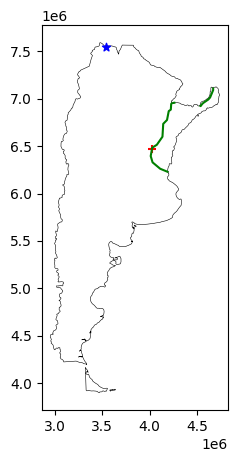

In [56]:
#ploteo usando de base a argentina
base=argentina_proy.plot(facecolor="white", edgecolor='black', linewidth=0.4,figsize=(5,5))
mas_cerca.plot(ax=base, marker='+', color='red')
mas_lejos.plot(ax=base, marker='*', color ='blue')
rioParana.plot(ax=base, color='green', markersize=1)

In [57]:
# EJERCICIO 3
# Create a HULL for some set of line map.
# Compute the distance matrix between the HULLS and a map of points.
# Plot the HULLS and the points. Show the closest and farthest points to the HULL.

In [58]:
#Filtro el GeoDataFrame riosAR_proy para excluir todas las filas donde la columna SYSTEM es NaN.
riosAR_proy[~riosAR_proy.SYSTEM.isna()]

,NAME,SYSTEM,geometry
56,Parana,Parana,"MULTILINESTRING ((4245550.485 6958364.517, 425..."
55,Paraguay,Parana,"LINESTRING (4245333.32 6960090.618, 4244846.62..."


In [59]:
#Hago que cada valor único en la columna SYSTEM representa una fila.
#Las geometrías se disuelven para formar una única geometría por cada valor de SYSTEM.
systems=riosAR_proy.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,
Parana,"MULTILINESTRING ((4245550.485 6958364.517, 425...",Parana


In [60]:
#formateo el geodataframe
systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

#lo muestro
systems

,SYSTEM,geometry
0,Parana,"MULTILINESTRING ((4245550.485 6958364.517, 425..."


In [61]:
#realizo el convex hull (la envolvente), convirtiendolo en un poligono
systems.convex_hull

,0
0,"POLYGON ((4198311.805 6225683.414, 4111782.342..."


<Axes: >

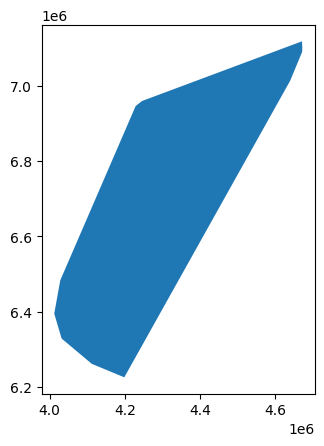

In [62]:
#ploteo el convex hull de systems
systems.convex_hull.plot()

In [63]:
#systems_hulls ahora es un GeoDataFrame con dos columnas: geometry (contiene el convex hull de las
# geometrías de systems) y system (nombres asociados a cada poligono)
#sistema de coordenadas EPSG:5345
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Parana']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:5345"
systems_hulls

,geometry,system
0,"POLYGON ((4198311.805 6225683.414, 4111782.342...",Parana


In [64]:
#de todas las geometrias de argentina aeropuertos arriba (puntos) saco la distancia a systems_hulls (poligono) con la funcion definida
#coloco el nombre correspondiente a las filas y columnas segun la data de cada tabla y lo ordeno alfabeticamente y lo muestro
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: argentina_aeropuertos_proy_arriba.set_index('fna').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

fna,Aeropuerto Brigadier Mayor César Raúl Ojeda,Aeropuerto Capitán Vicente Almandos Almonacid,Aeropuerto Comodoro Juan José Pierrestegui,Aeropuerto Coronel Felipe Varela,Aeropuerto Doctor Guillermo Snopek,Aeropuerto Domingo Faustino Sarmiento,Aeropuerto General Enrique Mosconi,Aeropuerto General Justo José de Urquiza,Aeropuerto Internacional Doctor Fernando Piragine Niveyro,Aeropuerto Internacional El Pucú,...,Aeropuerto Internacional Valle del Conlara,Aeropuerto Metropolitano Santa Fe - Sauce Viejo,Aeropuerto Primer Teniente Jorge Eduardo Casco,Aeropuerto Regional Presidente Néstor Carlos Kirchner,Aeropuerto Río Cuarto,Aeropuerto Suboficial Ayudante Santiago Germano,Aeropuerto Teniente Daniel Jukic,Aeropuerto Termas de Río Hondo,Aeropuerto Vicecomodoro Ángel de la Paz Aragonés,Aeropuerto Villa Reynolds
system,,,,,,,,,,,,,,,,,,,,,
Parana,550.138983,661.261323,0.0,603.413457,913.726484,750.262426,745.756027,2.941722,9.368574,99.103991,...,435.564078,34.461745,198.001767,252.661584,356.072951,766.106442,28.550102,576.289023,507.845965,471.489436


In [65]:
#el aeropuerto (punto) mas cercano al poligono Parana
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

,0
system,
Parana,Aeropuerto Comodoro Juan José Pierrestegui


In [66]:
#el aeropuerto (punto) mas lejos al poligono Parana
max=distanceMatrixKM_sysHull_air.idxmax(axis="columns")
max

,0
system,
Parana,Aeropuerto Doctor Guillermo Snopek


In [67]:
#Guardo las variables
mas_cercano= argentina_aeropuertos_proy_arriba[argentina_aeropuertos_proy_arriba.fna=='Aeropuerto Comodoro Juan José Pierrestegui']
mas_lejano= argentina_aeropuertos_proy_arriba[argentina_aeropuertos_proy_arriba.fna=='Aeropuerto Doctor Guillermo Snopek']

<Axes: >

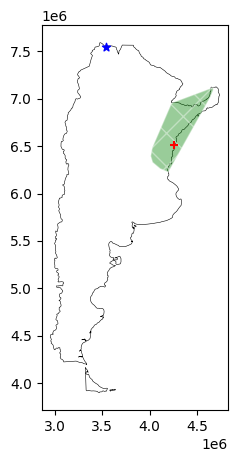

In [68]:
#ploteo usando de base a argentina
base=argentina_proy.plot(facecolor="white", edgecolor='black', linewidth=0.4,figsize=(5,5))
systems_hulls.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')
mas_cercano.plot(ax=base, marker='+', color='red')
mas_lejano.plot(ax=base, marker='*', color ='blue')

In [87]:
# EJERCICIO 4
# Select a line map and a point one.
# Get the buffer for the lines, select a distance.
# Keep the points that are within the buffer (you might need to play with differn distances until you show something interesting.

In [88]:
#recuerdo la distancia entre ríos y aeropuertos
distanceMatrixKM_riv_air

fna,Aeropuerto Brigadier Mayor César Raúl Ojeda,Aeropuerto Capitán Vicente Almandos Almonacid,Aeropuerto Comodoro Juan José Pierrestegui,Aeropuerto Coronel Felipe Varela,Aeropuerto Doctor Guillermo Snopek,Aeropuerto Domingo Faustino Sarmiento,Aeropuerto General Enrique Mosconi,Aeropuerto General Justo José de Urquiza,Aeropuerto Internacional Doctor Fernando Piragine Niveyro,Aeropuerto Internacional El Pucú,...,Aeropuerto Internacional Valle del Conlara,Aeropuerto Metropolitano Santa Fe - Sauce Viejo,Aeropuerto Primer Teniente Jorge Eduardo Casco,Aeropuerto Regional Presidente Néstor Carlos Kirchner,Aeropuerto Río Cuarto,Aeropuerto Suboficial Ayudante Santiago Germano,Aeropuerto Teniente Daniel Jukic,Aeropuerto Termas de Río Hondo,Aeropuerto Vicecomodoro Ángel de la Paz Aragonés,Aeropuerto Villa Reynolds
NAME,,,,,,,,,,,,,,,,,,,,,
Paraguay,1007.038347,848.043644,449.010412,730.928952,917.743948,1075.215390,747.510495,536.583900,31.660345,122.339383,...,859.355370,540.470947,208.489415,723.870309,852.797285,1246.287072,243.064329,639.435730,577.878435,973.382845
Parana,550.138983,661.273376,154.876724,616.191876,913.726484,750.262426,745.756027,2.941722,11.332473,117.978814,...,435.564078,34.461745,198.001767,252.661584,356.072951,766.106442,35.555451,583.017058,514.611054,471.489436


In [89]:
#minima distancia del rio Parana a un aeropuerto
distanceMatrixKM_riv_air.loc['Parana'].min()

2.9417215800943453

In [96]:
#determino la minima distancia y lo multiplico por 10000
minMts=distanceMatrixKM_riv_air.loc['Parana'].min()*10000

#veo que el buffer lo tengo como un poligono
riosAR_proy[riosAR_proy.NAME=='Parana'].buffer(distance = minMts)

,0
56,"MULTIPOLYGON (((4529942.856 6959679.77, 453306..."


In [97]:
# el código de arriba calcula la distancia mínima entre el río Paraná y el aeropuerto más cercano,
# crea un buffer alrededor del río con esa distancia como radio, y ese buffer se representa como un polígono.

In [98]:
! pip install mapclassify

In [99]:
# see buffer:
bufferAroundParana=riosAR_proy[riosAR_proy.NAME=='Parana'].buffer(distance = minMts)
bufferAroundParana = bufferAroundParana.to_crs(5345)
bufferAroundParana = bufferAroundParana.to_crs(5345)
bufferAsBase=bufferAroundParana.explore(color='red')
riosAR_proy[riosAR_proy.NAME=='Parana'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [101]:
#veo los seaports
seaports_arg_proy

,portName,Country Code,Latitude,Longitude,geometry
0,Puerto Madryn,Argentina,-42.766667,-65.033333,POINT (3579121.052 5264714.345)
1,Mar Del Plata,Argentina,-38.033333,-57.533333,POINT (4243963.465 5756761.668)
2,La Plata,Argentina,-34.833333,-57.883333,POINT (4243321.525 6115670.205)
3,Buenos Aires,Argentina,-34.600000,-58.366667,POINT (4200946.219 6145140.648)
4,Puerto Rosales,Argentina,-38.933333,-62.066667,POINT (3841107 5683499.212)
5,Puerto Deseado,Argentina,-47.750000,-65.900000,POINT (3507498.705 4711330.932)
6,Puerto Belgrano,Argentina,-38.883333,-62.100000,POINT (3838453.133 5689177.047)
7,Puerto Santa Cruz,Argentina,-50.016667,-68.516667,POINT (3319638.295 4456229.476)
8,Comodoro Rivadavia,Argentina,-45.866667,-67.466667,POINT (3386115.099 4919654.151)
9,Bahia Blanca,Argentina,-38.783333,-62.266667,POINT (3824439.273 5700889.254)


In [102]:
# graficamos los seaports, el rio y el buffer de este
riosAR_proy[riosAR_proy.NAME=='Parana'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
seaports_arg_proy.explore(m=bufferAsBase,color='black')

In [103]:
riversWithinBuffer=seaports_arg_arriba.clip(mask=bufferAroundParana)

#veo los seaports dentro del buffer
riversWithinBuffer

,portName,Country Code,Latitude,Longitude,geometry
27,Puerto Ibicuy,Argentina,-33.750000,-59.183333,POINT (4132168.886 6245082.922)
36,San Pedro,Argentina,-33.583333,-59.816667,POINT (4074455.158 6267334.594)
17,Ramallo,Argentina,-33.483333,-60.016667,POINT (4056491.237 6279546.669)
26,San Nicolas,Argentina,-33.333333,-60.233333,POINT (4037239.543 6297362.344)
30,Villa Constitucion,Argentina,-33.300000,-60.333333,POINT (4028112.954 6301579.696)
22,Villa Constitucion,Argentina,-33.233333,-60.333333,POINT (4028516.201 6308988.161)
25,Rosario,Argentina,-32.950000,-60.633333,POINT (4002116.82 6341950.4)
33,San Lorenzo,Argentina,-32.750000,-60.733333,POINT (3993860.738 6364643.697)
29,Puerto San Martin,Argentina,-32.716667,-60.733333,POINT (3994045.325 6368346.842)
11,Diamante,Argentina,-32.066667,-60.650000,POINT (4005494.834 6440169.389)


In [104]:
#ploteo los seaports que estan dentro del buffer
bufferAsBase=bufferAroundParana.explore(color='red')
riosAR_proy[riosAR_proy.NAME=='Parana'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

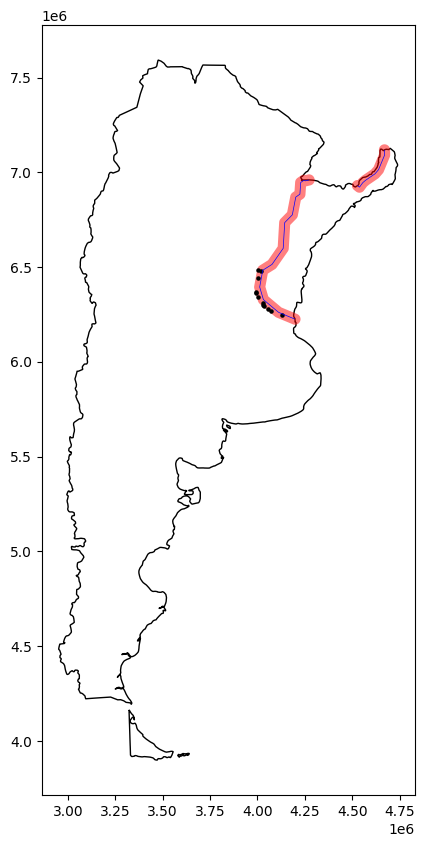

In [105]:
import matplotlib.pyplot as plt

# 1. Crear la figura y los ejes:
fig, ax = plt.subplots(figsize=(10, 10))

# 2. Plotear Argentina como base:
argentina_proy.plot(ax=ax, color='white', edgecolor='black')

# 3. Plotear el buffer:
bufferAroundParana.plot(ax=ax, color='red', alpha=0.5)

# 4. Plotear el río Amazonas:
riosAR_proy[riosAR_proy.NAME == 'Parana'].plot(
    ax=ax, color='blue', linewidth=0.5
)

# 5. Plotear los seaports dentro del buffer:
riversWithinBuffer.plot(ax=ax, color='black', marker='o', markersize=5)

# 6. Mostrar el mapa:
plt.show()

In [106]:
# EJERCICIO 5
# Get a polygons map of the lowest administrative unit possible.
# Get a table of variables for those units. At least 3 numerical variables.
# Preprocess both tables and get them ready for merging.
# Do the merging, making the changes needed so that you keep the most columns.

<Axes: >

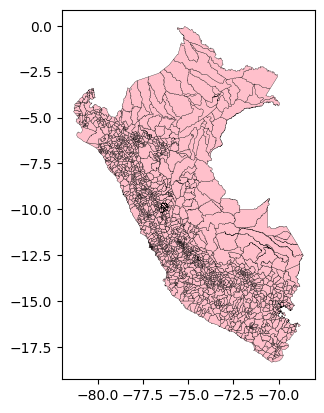

In [107]:
# mapa de los distritos
import geopandas as gpd

peruMapaDistLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/maps/DistritosMap.zip"

mapdis=gpd.read_file(peruMapaDistLink)
# proyectando a un crs de Perú
mapdis_proy = mapdis.to_crs(5381)
mapdis_proy.plot(color='pink', edgecolor='black', linewidth=0.2)

In [108]:
# tabla de datos
import pandas as pd
import os

peruDataLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/dataPeru_indicadores.xlsx"
datadis=pd.read_excel(peruDataLink,
                     dtype={'Ubigeo': object})
datadis

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,010202,Amazonas,Bagua,ARAMANGO,10940,809.07,0.361182,37.545885,62.9,9.1
1,010201,Amazonas,Bagua,BAGUA,26091,150.99,0.584063,70.795501,25.4,0.7
2,010203,Amazonas,Bagua,COPALLIN,6319,99.05,0.467245,52.571361,45.4,2.1
3,010204,Amazonas,Bagua,EL PARCO,1492,18.48,0.489049,70.215409,59.9,1.5
4,010205,Amazonas,Bagua,IMAZA,24323,4430.84,0.298089,31.295719,88.4,11.7
...,...,...,...,...,...,...,...,...,...,...
1869,250303,Ucayali,Padre Abad,CURIMANA,8956,2134.04,0.379723,40.397763,57.1,13.1
1870,250302,Ucayali,Padre Abad,IRAZOLA,10830,998.93,0.387806,40.104714,59.2,16.4
1871,250304,Ucayali,Padre Abad,NESHUYA,8445,579.51,0.455819,45.883427,60.7,8.5
1872,250301,Ucayali,Padre Abad,PADRE ABAD,26614,4689.20,0.475207,47.177338,47.0,12.6


In [109]:
mapdis_proy.merge(datadis, left_on='DISTRITO', right_on='Distrito').shape

(2323, 15)

In [111]:
#preprocesar ambas tablas y preparamos para la fusión.
#todo en mayúsculas, sin espacios vacíos antes ni después.
capitalizeColumns=lambda x: x.str.upper().str.strip()
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].apply(capitalizeColumns)
mapdis_proy[['PROVINCIA','DISTRITO']]=mapdis_proy[['PROVINCIA','DISTRITO']].apply(capitalizeColumns)

#para usar unidecode
!pip install unidecode
import unidecode


byePunctuation=lambda x: unidecode.unidecode(x)
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].map(byePunctuation)  #applymap for olderpandas
mapdis_proy[['PROVINCIA','DISTRITO']]=mapdis_proy[['PROVINCIA','DISTRITO']].map(byePunctuation) #applymap for olderpandas

# concatenating, crear columna provdist para facilitar merging
datadis['provDist']=["+".join(pd) for pd in zip (datadis.Provincia,datadis.Distrito)]
mapdis_proy['provDist']=["+".join(pd) for pd in zip (mapdis_proy.PROVINCIA,mapdis.DISTRITO)]

In [112]:
datadis

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,provDist
0,010202,Amazonas,BAGUA,ARAMANGO,10940,809.07,0.361182,37.545885,62.9,9.1,BAGUA+ARAMANGO
1,010201,Amazonas,BAGUA,BAGUA,26091,150.99,0.584063,70.795501,25.4,0.7,BAGUA+BAGUA
2,010203,Amazonas,BAGUA,COPALLIN,6319,99.05,0.467245,52.571361,45.4,2.1,BAGUA+COPALLIN
3,010204,Amazonas,BAGUA,EL PARCO,1492,18.48,0.489049,70.215409,59.9,1.5,BAGUA+EL PARCO
4,010205,Amazonas,BAGUA,IMAZA,24323,4430.84,0.298089,31.295719,88.4,11.7,BAGUA+IMAZA
...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,Ucayali,PADRE ABAD,CURIMANA,8956,2134.04,0.379723,40.397763,57.1,13.1,PADRE ABAD+CURIMANA
1870,250302,Ucayali,PADRE ABAD,IRAZOLA,10830,998.93,0.387806,40.104714,59.2,16.4,PADRE ABAD+IRAZOLA
1871,250304,Ucayali,PADRE ABAD,NESHUYA,8445,579.51,0.455819,45.883427,60.7,8.5,PADRE ABAD+NESHUYA
1872,250301,Ucayali,PADRE ABAD,PADRE ABAD,26614,4689.20,0.475207,47.177338,47.0,12.6,PADRE ABAD+PADRE ABAD


In [113]:
datadis.Distrito.duplicated().sum(),mapdis_proy.DISTRITO.duplicated().sum()

(154, 152)

In [114]:
nomatch_df=set(datadis.provDist)- set(mapdis_proy.provDist)
nomatch_gdf=set(mapdis_proy.provDist)-set(datadis.provDist)
len(nomatch_df), len(nomatch_gdf)

(88, 88)

In [118]:
!pip install thefuzz
from thefuzz import process

#eligimos las coincidencia más cercanas de nomatch_gdf para un valor en nomatch_df
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('ACOMAYO+SANGARARA', ('ACOMAYO+SANGARARA\xa0', 100)),
 ('ANGARAES+HUANCA-HUANCA', ('ANGARAES+HUANCA HUANCA', 100)),
 ('ANGARAES+HUAYLLAY GRANDE', ('ANGARAES+HUALLAY GRANDE', 98)),
 ('AREQUIPA+QUEQUENA', ('AREQUIPA+QUEQUEÑA', 97)),
 ('ATALAYA+YURUA', ('ATALAYA+YURÚA', 96)),
 ('AYMARAES+CARAYBAMBA', ('AYMARAES+CARAIBAMBA', 95)),
 ('AYMARAES+HUAYLLO', ('AYMARAES+IHUAYLLO', 97)),
 ('AYMARAES+SAN JUAN DE CHACNA', ('AYMARAES+SAN JUAN DE CHACÑA', 98)),
 ('AYMARAES+SANAYCA', ('AYMARAES+SAÑAYCA', 97)),
 ('AZANGARO+MUNANI', ('AZANGARO+MUÑANI', 97)),
 ('CAJAMARCA+ENCANADA', ('CAJAMARCA+ENCAÑADA', 97)),
 ('CAJAMARCA+JESUS', ('CAJAMARCA+JESÚS', 97)),
 ('CAJAMARCA+LOS BANOS DEL INCA', ('CAJAMARCA+LOS BAÑOS DEL INCA', 98)),
 ('CAMANA+CAMANA', ('CAMANA+CAMANA\xa0', 100)),
 ('CAMANA+MARIANO NICOLAS VALCARCEL',
  ('CAMANA+MARIANO NICOLAS VALCáRCEL', 98)),
 ('CAMANA+OCONA', ('CAMANA+OCOÑA', 96)),
 ('CANAS+TUPAC AMARU', ('CANAS+TÚPAC AMARU', 97)),
 ('CANETE+LUNAHUANA', ('CANETE+LUNAHUANA\xa0', 100)),
 (

In [119]:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}
changesDis_df

{'ACOMAYO+SANGARARA': 'ACOMAYO+SANGARARA\xa0',
 'ANGARAES+HUANCA-HUANCA': 'ANGARAES+HUANCA HUANCA',
 'ANGARAES+HUAYLLAY GRANDE': 'ANGARAES+HUALLAY GRANDE',
 'AREQUIPA+QUEQUENA': 'AREQUIPA+QUEQUEÑA',
 'ATALAYA+YURUA': 'ATALAYA+YURÚA',
 'AYMARAES+CARAYBAMBA': 'AYMARAES+CARAIBAMBA',
 'AYMARAES+HUAYLLO': 'AYMARAES+IHUAYLLO',
 'AYMARAES+SAN JUAN DE CHACNA': 'AYMARAES+SAN JUAN DE CHACÑA',
 'AYMARAES+SANAYCA': 'AYMARAES+SAÑAYCA',
 'AZANGARO+MUNANI': 'AZANGARO+MUÑANI',
 'CAJAMARCA+ENCANADA': 'CAJAMARCA+ENCAÑADA',
 'CAJAMARCA+JESUS': 'CAJAMARCA+JESÚS',
 'CAJAMARCA+LOS BANOS DEL INCA': 'CAJAMARCA+LOS BAÑOS DEL INCA',
 'CAMANA+CAMANA': 'CAMANA+CAMANA\xa0',
 'CAMANA+MARIANO NICOLAS VALCARCEL': 'CAMANA+MARIANO NICOLAS VALCáRCEL',
 'CAMANA+OCONA': 'CAMANA+OCOÑA',
 'CANAS+TUPAC AMARU': 'CANAS+TÚPAC AMARU',
 'CANETE+LUNAHUANA': 'CANETE+LUNAHUANA\xa0',
 'CANETE+QUILMANA': 'CANETE+QUILMANA\xa0',
 'CANETE+SAN VICENTE DE CANETE': 'CANETE+SAN VICENTE DE CAÑETE',
 'CANETE+ZUNIGA': 'CANETE+ZÚÑIGA',
 'CASTILL

In [121]:
datadis.replace({'provDist':changesDis_df},inplace=True)

#realizamos la fusión, realizando los cambios necesarios para conservar la mayor cantidad de columnas
datadisMap=mapdis_proy.merge(datadis, on='provDist')
bye=['Departamento', 'Provincia', 'Distrito','INSTITUCIO','provDist']
datadisMap.drop(columns=bye,inplace=True)

#muestro los primeros datos
datadisMap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",230110,123662,187.74,0.578968,71.178389,15.8,0.8
1,TACNA,TACNA,POCOLLAY,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9...",230108,22319,265.65,0.645954,75.825743,16.1,0.9
2,TACNA,TACNA,CALANA,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9...",230103,3338,108.38,0.564102,77.829717,15.9,3.3
3,TACNA,TACNA,TACNA,"POLYGON ((-70.3149 -17.94498, -70.30682 -17.95...",230101,80845,1877.78,0.696613,75.491958,7.4,0.6
4,TACNA,TACNA,SAMA,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",230109,2679,1115.98,0.552622,70.500250,52.4,10.8


In [135]:
# EJERCICIO 6
# Compute the neighbors of the capital of your country. Plot the results for each of the options.

In [132]:
#instalo mapclassify y libpysal
! pip install mapclassify
! pip install libpysal

In [136]:
#importamos
from libpysal.weights import Queen
from libpysal.weights import Rook
from libpysal.weights import KNN

In [137]:
#rook
w_rook = Rook.from_dataframe(datadisMap, use_index = False)

In [138]:
lima_data = datadisMap[(datadisMap['DEPARTAMEN'] == 'LIMA') & (datadisMap['PROVINCIA'] == 'LIMA')]
lima_data.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
1824,LIMA,LIMA,SANTA ROSA,"POLYGON ((-77.18443 -11.78003, -77.15744 -11.7...",150139,20112,21.35,0.660577,67.618560,26.5,1.3
1825,LIMA,LIMA,PUENTE PIEDRA,"POLYGON ((-77.0909 -11.82192, -77.09048 -11.82...",150125,378910,72.81,0.663263,73.192237,23.3,3.2
1827,LIMA,LIMA,SAN JUAN DE LURIGANCHO,"POLYGON ((-76.93118 -11.87037, -76.9282 -11.87...",150132,1156300,131.25,0.701053,73.146948,19.4,1.1
1828,LIMA,LIMA,LURIGANCHO,"POLYGON ((-76.71079 -11.89198, -76.71027 -11.8...",150118,232902,236.47,0.683195,74.490008,22.9,5.9
1829,LIMA,LIMA,COMAS,"POLYGON ((-77.0467 -11.89373, -77.04822 -11.89...",150110,545685,48.75,0.721893,77.958189,15.3,0.9


In [141]:
#contamos los vecinos
len (w_rook.neighbors[1846])

# Distrito: San Luis

4

In [143]:
#mostramos la data
datadisMap.iloc[w_rook.neighbors[1846],]

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
1835,LIMA,LIMA,ATE,"POLYGON ((-76.81686 -12.00133, -76.81396 -12.0...",150103,672160,77.72,0.686855,76.308946,18.0,1.3
1853,LIMA,LIMA,SAN BORJA,"POLYGON ((-76.98587 -12.08173, -76.98585 -12.0...",150130,114479,9.96,0.823616,78.762975,2.1,0.0
1845,LIMA,LIMA,LA VICTORIA,"POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...",150115,169270,8.74,0.714159,74.791799,15.3,0.0
1837,LIMA,LIMA,EL AGUSTINO,"POLYGON ((-76.94766 -12.02089, -76.94332 -12.0...",150111,198366,12.54,0.697062,73.571515,14.6,0.1


<Axes: >

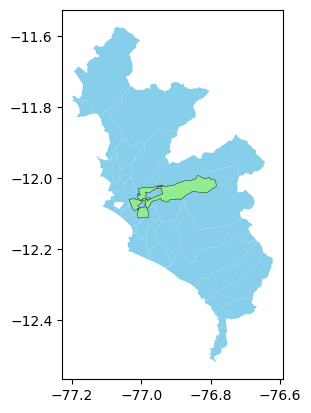

In [144]:
# usando rook: Una entidad es vecina solo si comparten un borde, excluyendo vértices diagonales
base = datadisMap [datadisMap.PROVINCIA == "LIMA"].plot(facecolor = 'skyblue')
datadisMap.iloc[w_rook.neighbors[1846],].plot(ax = base, facecolor = 'lightgreen', edgecolor = 'k', linewidth =0.3)

In [146]:
# queen
w_queen = Queen.from_dataframe(datadisMap,use_index=False)

In [147]:
len(w_queen.neighbors[1846])

5

<Axes: >

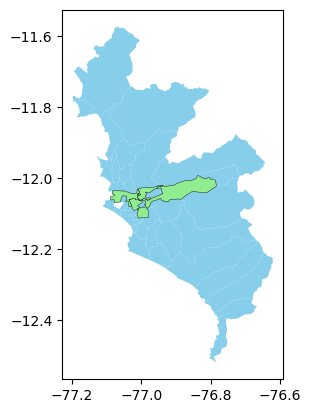

In [148]:
# usando queen : Una entidad se considera vecina de otra si comparten un vértice o borde.
base=datadisMap[datadisMap.PROVINCIA=="LIMA"].plot(color= 'skyblue')
datadisMap.iloc[w_queen.neighbors[1846] ,].plot(ax=base,facecolor="lightgreen",edgecolor='k', linewidth=0.3)

In [150]:
# k=8 vecinos cercanos
w_knn8 = KNN.from_dataframe(datadisMap, k=8)

In [151]:
#muestro la data
datadisMap.iloc[w_knn8.neighbors[1846] ,]

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
1845,LIMA,LIMA,LA VICTORIA,"POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...",150115,169270,8.74,0.714159,74.791799,15.3,0.0
1853,LIMA,LIMA,SAN BORJA,"POLYGON ((-76.98587 -12.08173, -76.98585 -12.0...",150130,114479,9.96,0.823616,78.762975,2.1,0.0
1837,LIMA,LIMA,EL AGUSTINO,"POLYGON ((-76.94766 -12.02089, -76.94332 -12.0...",150111,198366,12.54,0.697062,73.571515,14.6,0.1
1852,LIMA,LIMA,LINCE,"POLYGON ((-77.02807 -12.07871, -77.02471 -12.0...",150116,49833,3.03,0.842428,82.555665,5.4,0.0
1856,LIMA,LIMA,SURQUILLO,"POLYGON ((-77.01498 -12.10778, -77.01469 -12.1...",150141,92908,3.46,0.817114,79.576586,6.4,0.0
1838,LIMA,LIMA,SANTA ANITA,"POLYGON ((-76.94281 -12.02946, -76.9425 -12.03...",150137,242026,10.69,0.734731,76.479814,14.3,0.0
1855,LIMA,LIMA,SAN ISIDRO,"POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...",150131,54298,11.10,0.788832,78.470219,1.1,0.0
1850,LIMA,LIMA,JESUS MARIA,"POLYGON ((-77.04242 -12.08297, -77.04311 -12.0...",150113,72804,4.57,0.837190,81.092223,3.0,0.0


<Axes: >

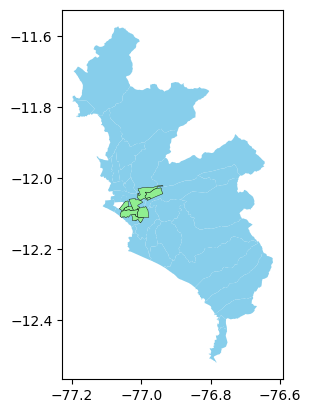

In [152]:
# usando knn : Basada en la proximidad geográfica. Cada entidad se conecta con sus k vecinos más cercanos, independientemente de si comparten bordes o vértices.
base=datadisMap[datadisMap.PROVINCIA=="LIMA"].plot(color='skyblue')
datadisMap.iloc[w_knn8.neighbors[1846],].plot(ax=base,facecolor="lightgreen", edgecolor='k', linewidth=0.3)